<a href="https://colab.research.google.com/github/Cricket-Engineer/Analisis-de-Ventas-de-Hipermercado/blob/main/An%C3%A1lisis_de_ventas_de_hipermercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTACION DE LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv("/content/sample_data/train.csv", encoding='latin1')
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
#INFORMACION GENERAL DE LOS DATOS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
#CALCULAR CANTIDAD DE VALORES NULOS
null_count= df['Postal Code'].isnull().sum()
print(null_count)

11


In [ ]:
#RELLENAR CON 0 VALORES NULOS -->el inplace remplaza en el df original y no hace una copia nueva
df['Postal Code'].fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

/tmp/ipython-input-1193798442.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal Code'].fillna(0, inplace=True)


In [ ]:
#CAMBIAR DE FLOAT A ENTERO
df['Postal Code'] = df['Postal Code'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int64  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55211.280918,230.769059
std,2829.160653,32076.677954,626.651875
min,1.000000,0.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


##**DATA CLEANING**

In [ ]:
##CHEQUEAR DUPLICADOS
if df.duplicated().sum() > 0:
  print("Existen duplicados")
else:
  print("No existen duplicados")

No existen duplicados


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9795,False
9796,False
9797,False
9798,False


In [ ]:
df.duplicated(keep=False).sum() ##'first', 'last' ó 'False'

np.int64(0)

In [ ]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [ ]:
#tipos de consumidores
types_of_consumers = df['Segment'].unique()
print(types_of_consumers)

['Consumer' 'Corporate' 'Home Office']


In [ ]:
sum_customer= df['Segment'].value_counts().reset_index()

sum_customer = sum_customer.rename(columns={'Segment':'Tipo Cliente','count':'Total clientes'})

print(sum_customer)


  Tipo Cliente  Total clientes
0     Consumer            5101
1    Corporate            2953
2  Home Office            1746


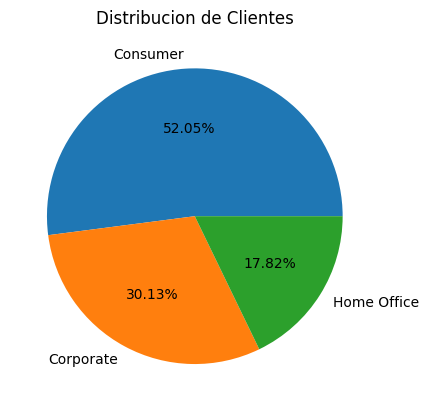

In [ ]:
#Trazar un gráfico circular
plt.pie(sum_customer['Total clientes'], labels= sum_customer['Tipo Cliente'], autopct='%1.2f%%')
plt.title('Distribucion de Clientes')
plt.show()

In [ ]:
ventas_por_categoria= df.groupby('Segment')['Sales'].sum().reset_index()
ventas_por_categoria=ventas_por_categoria.rename(columns={'Segment':'Tipo Cliente','Sales':'Total Ventas'})
print(ventas_por_categoria)

  Tipo Cliente  Total Ventas
0     Consumer  1.148061e+06
1    Corporate  6.884941e+05
2  Home Office  4.249822e+05


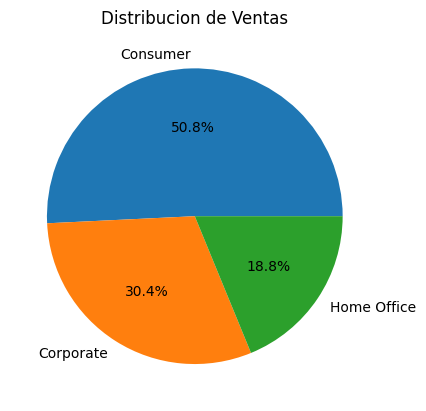

In [ ]:
plt.pie(ventas_por_categoria['Total Ventas'], labels= sum_customer['Tipo Cliente'], autopct='%1.1f%%')
plt.title('Distribucion de Ventas')
plt.show()

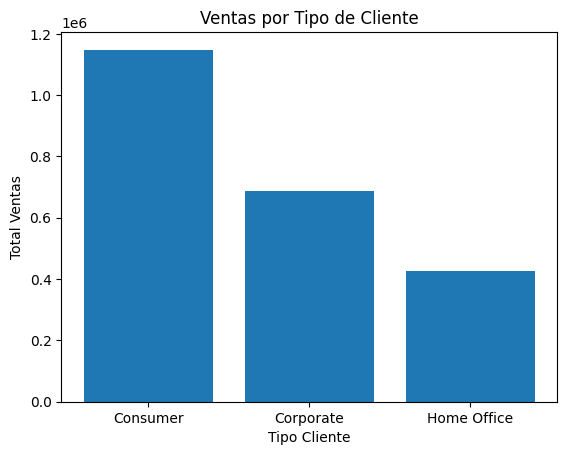

In [ ]:
plt.bar(ventas_por_categoria['Tipo Cliente'], ventas_por_categoria['Total Ventas'])

plt.title('Ventas por Tipo de Cliente')
plt.xlabel('Tipo Cliente')
plt.ylabel('Total Ventas')

plt.show()

##**LEALTAD DE CLIENTE**

In [ ]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [ ]:
#AGRUPA LOS DATOS SEGUN 'Customer ID', 'Customer Name','Segment' Y CALCULA LA FRECUENCIA EN BASE AL 'Order ID'
frec_orden_cliente= df.groupby(['Customer ID', 'Customer Name','Segment'])['Order ID'].count().reset_index()

#RENOMBRA LA COLUMNA PERO NO CREA UNA COPIA SINO MODIFICA EN EL DF ORIGINAL
frec_orden_cliente= frec_orden_cliente.rename(columns={'Order ID':'Total Ordenes'}, inplace=False)

#IDENTIFICA CLIENTES REPETIDOS
cliente_repetidos= frec_orden_cliente[frec_orden_cliente['Total Ordenes']>=1]

#ORDENA LOS CLIENTES REPETIDOS EN ORDEN DESCENDENTE
orden_cliente_repetidos = cliente_repetidos.sort_values(by='Total Ordenes', ascending=False)
print(orden_cliente_repetidos.head(5).reset_index(drop=True))

#48:10

  Customer ID  Customer Name      Segment  Total Ordenes
0    WB-21850  William Brown     Consumer             35
1    PP-18955     Paul Prost  Home Office             34
2    MA-17560   Matt Abelman  Home Office             34
3    JL-15835       John Lee     Consumer             33
4    SV-20365    Seth Vernon     Consumer             32


In [ ]:
#RANKEAR A LOS CLIENTES SEGUN EL NUMERO DE VENTAS
ventas_clientes = df.groupby(['Customer ID','Customer Name','Segment'])['Sales'].sum().reset_index()
mayor_compradores= ventas_clientes.sort_values(by='Sales',ascending=False)
print(mayor_compradores.head(5).reset_index(drop=True))

  Customer ID  Customer Name      Segment      Sales
0    SM-20320    Sean Miller  Home Office  25043.050
1    TC-20980   Tamara Chand    Corporate  19052.218
2    RB-19360   Raymond Buch     Consumer  15117.339
3    TA-21385   Tom Ashbrook  Home Office  14595.620
4    AB-10105  Adrian Barton     Consumer  14473.571


##**ANÁLISIS DE LOS MÉTODOS DE ENVÍO**

In [ ]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
#Ordena los valores unicos de la columna ship mode en una nueva serie
tipo_envio = df['Ship Mode'].unique()
print(tipo_envio)

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [ ]:
#frecuencia de cada metodo de envio
modo_envio= df['Ship Mode'].value_counts().reset_index()
modo_envio = modo_envio.rename(columns={'Ship Mode':'Modo de Envio', 'count': 'Frecuencia de Uso'})
print(modo_envio)

    Modo de Envio  Frecuencia de Uso
0  Standard Class               5859
1    Second Class               1902
2     First Class               1501
3        Same Day                538


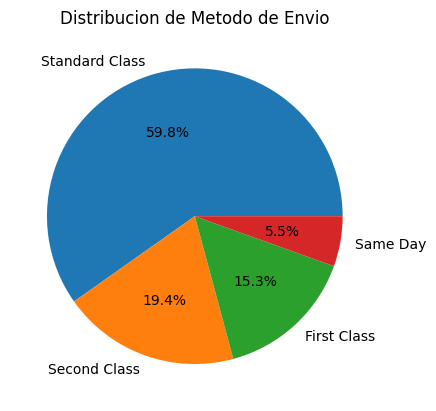

In [ ]:
plt.pie(modo_envio['Frecuencia de Uso'], labels= modo_envio['Modo de Envio'], autopct='%1.1f%%')
plt.title('Distribucion de Metodo de Envio')
plt.show()

##**ANALISIS GEOGRAFICO DE CLIENTES Y VENTAS**

In [ ]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
#Clientes por estado
state = df['State'].value_counts().reset_index()
state = state.rename(columns={'State':'Estado','count':'Total Clientes'})
print(state)


                  Estado  Total Clientes
0             California            1946
1               New York            1097
2                  Texas             973
3           Pennsylvania             582
4             Washington             504
5               Illinois             483
6                   Ohio             454
7                Florida             373
8               Michigan             253
9         North Carolina             247
10              Virginia             224
11               Arizona             223
12             Tennessee             183
13              Colorado             179
14               Georgia             177
15              Kentucky             137
16               Indiana             135
17         Massachusetts             135
18                Oregon             122
19            New Jersey             122
20              Maryland             105
21             Wisconsin             105
22              Delaware              93
23             M

In [ ]:
 #Clientes por ciudad
state = df['City'].value_counts().reset_index()
state = state.rename(columns={'City':'Ciudad','count':'Total Clientes'})
print(state)

            Ciudad  Total Clientes
0    New York City             891
1      Los Angeles             728
2     Philadelphia             532
3    San Francisco             500
4          Seattle             426
..             ...             ...
524      Goldsboro               1
525     Montebello               1
526        Abilene               1
527         Normal               1
528     Springdale               1

[529 rows x 2 columns]


In [ ]:
#ventas por estado
ventas_estado= df.groupby(['State'])['Sales'].sum().reset_index()
top_ventas_estado= ventas_estado.sort_values(by='Sales',ascending=False)
print(top_ventas_estado.head(10).reset_index(drop=True))

          State        Sales
0    California  446306.4635
1      New York  306361.1470
2         Texas  168572.5322
3    Washington  135206.8500
4  Pennsylvania  116276.6500
5       Florida   88436.5320
6      Illinois   79236.5170
7      Michigan   76136.0740
8          Ohio   75130.3500
9      Virginia   70636.7200


In [ ]:
#ventas por ciudad
ventas_estado= df.groupby(['City'])['Sales'].sum().reset_index()
top_ventas_estado= ventas_estado.sort_values(by='Sales',ascending=False)
print(top_ventas_estado.head(10).reset_index(drop=True))

            City        Sales
0  New York City  252462.5470
1    Los Angeles  173420.1810
2        Seattle  116106.3220
3  San Francisco  109041.1200
4   Philadelphia  108841.7490
5        Houston   63956.1428
6        Chicago   47820.1330
7      San Diego   47521.0290
8   Jacksonville   44713.1830
9        Detroit   42446.9440


##**ANALISIS DE PRODUCTOS**

In [ ]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [ ]:
#DETERMINAR CUANTAS CATEGORIAS EXISTEN
producto_categoria= df['Category'].unique()
print(producto_categoria)

['Furniture' 'Office Supplies' 'Technology']


In [ ]:
#DETERMINAR CUANTAS SUB-CATEGORIAS EXISTEN
producto_subcategoria= df.groupby('Category')['Sub-Category'].nunique().reset_index()
top_producto_subcategoria= producto_subcategoria.sort_values(by='Sub-Category',ascending=False)
print(top_producto_subcategoria.reset_index(drop=True))


          Category  Sub-Category
0  Office Supplies             9
1        Furniture             4
2       Technology             4


In [ ]:
#VENTAS POR CATEGORIA
ventas_categoria= df.groupby(['Category'])['Sales'].sum().reset_index()
ventas_categoria= ventas_categoria.sort_values(by='Sales',ascending=False)
print(ventas_categoria)

          Category        Sales
2       Technology  827455.8730
0        Furniture  728658.5757
1  Office Supplies  705422.3340


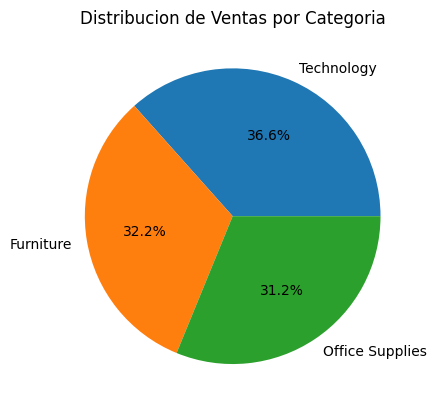

In [ ]:
## TRAZADO DE DIAGRAMA DE PIE
plt.pie(ventas_categoria['Sales'], labels= ventas_categoria['Category'], autopct='%1.1f%%')
plt.title('Distribucion de Ventas por Categoria')
plt.show()

In [ ]:
##AGRUPAR DATOS POR SUB-CATEGORIA VS VENTAS
pdt_subcategoria= df.groupby(['Sub-Category'])['Sales'].sum().reset_index()
pdt_subcategoria = pdt_subcategoria.sort_values(by='Sales',ascending=False)
print(pdt_subcategoria.reset_index(drop=True))

   Sub-Category        Sales
0        Phones  327782.4480
1        Chairs  322822.7310
2       Storage  219343.3920
3        Tables  202810.6280
4       Binders  200028.7850
5      Machines  189238.6310
6   Accessories  164186.7000
7       Copiers  146248.0940
8     Bookcases  113813.1987
9    Appliances  104618.4030
10  Furnishings   89212.0180
11        Paper   76828.3040
12     Supplies   46420.3080
13          Art   26705.4100
14    Envelopes   16128.0460
15       Labels   12347.7260
16    Fasteners    3001.9600


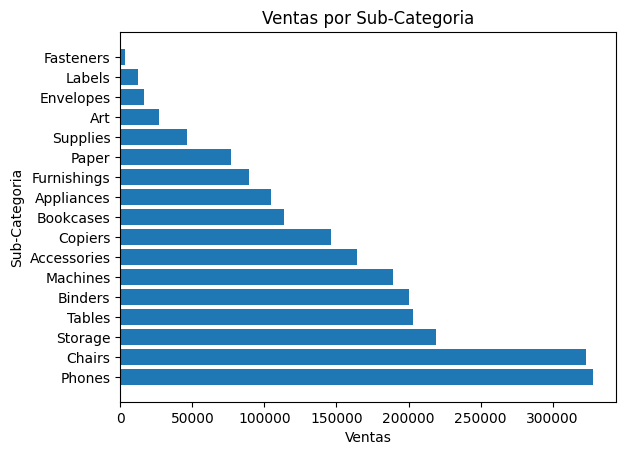

In [ ]:
plt.barh(pdt_subcategoria['Sub-Category'],pdt_subcategoria['Sales'])
plt.title('Ventas por Sub-Categoria')
plt.xlabel('Ventas')
plt.ylabel('Sub-Categoria')
plt.show()

##**Análisis de tendencias de ventas**

In [ ]:
df['Order Date']= pd.to_datetime(df['Order Date'],dayfirst=True)
año_ventas = df.groupby(df['Order Date'].dt.year)['Sales'].sum().reset_index()
año_ventas= año_ventas.rename(columns={'Order Date':'Fecha','Sales':'Ventas'})
print(año_ventas)

   Fecha       Ventas
0   2015  479856.2081
1   2016  459436.0054
2   2017  600192.5500
3   2018  722052.0192


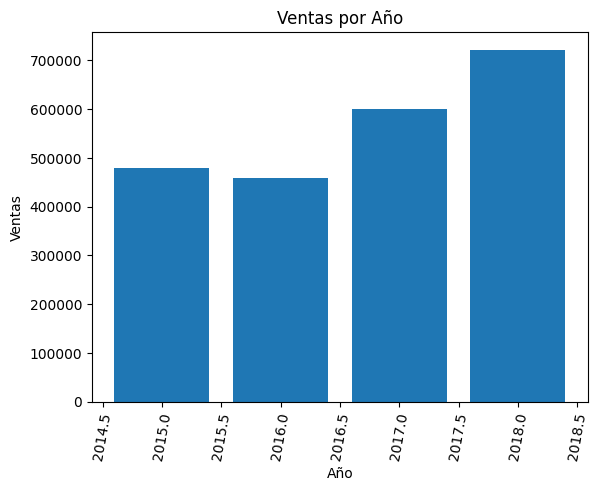

In [ ]:
#DIBUJAR BARRAS VERTICALES
plt.bar(año_ventas['Fecha'], año_ventas['Ventas'])
plt.title('Ventas por Año')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.xticks(rotation=80)
plt.show()

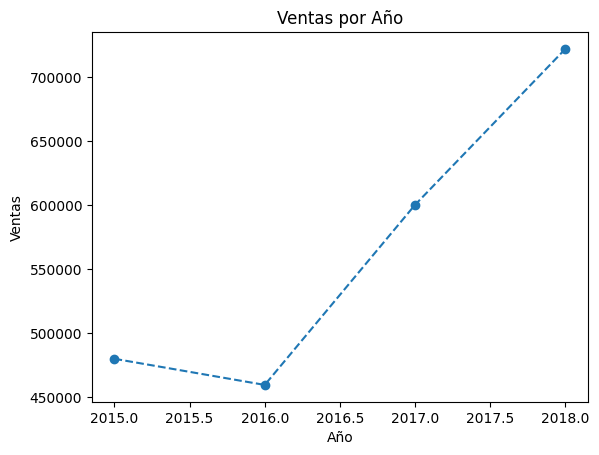

In [ ]:
#DIBUJAR BARRAS VERTICALES
plt.plot(año_ventas['Fecha'], año_ventas['Ventas'], marker='o', linestyle='--')
plt.title('Ventas por Año')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.show()

##**TENDENCIAS DE VENTAS TRIMESTRALES**

In [ ]:
#CONVERSION DE ORDER DATA A FORMATO DATATIME
df['Order Date']= pd.to_datetime(df['Order Date'],dayfirst=True)

#FILTRO DE ACUERDO EL AÑO # Se lo encierra dentro de un df[] para que devuelva todas las filas y valores; no solo un boleano
año_ventas= df[df['Order Date'].dt.year==2018]


In [ ]:
ventas_trimestrales = año_ventas.resample('QE', on='Order Date')['Sales'].sum().reset_index()
ventas_trimestrales = ventas_trimestrales.rename(columns={'Order Date':'Fecha','Sales':'Ventas'})
print('Estas son las ventas trimestrales del año 2018:')
print(ventas_trimestrales)

Estas son las ventas trimestrales del año 2018:
       Fecha       Ventas
0 2018-03-31  122260.8842
1 2018-06-30  127558.6200
2 2018-09-30  193815.8400
3 2018-12-31  278416.6750


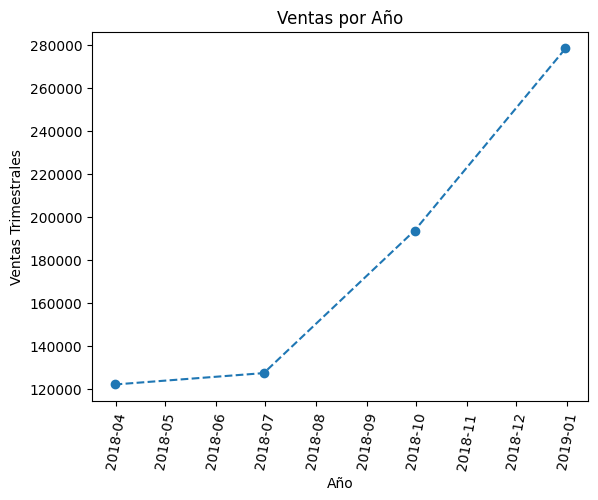

In [ ]:
#DIBUJAR BARRAS VERTICALES
plt.plot(ventas_trimestrales['Fecha'], ventas_trimestrales['Ventas'], marker='o', linestyle='--')
plt.title('Ventas por Año')
plt.xlabel('Año')
plt.xticks(rotation=80)
plt.ylabel('Ventas Trimestrales')
plt.show()

##**TENDENCIAS DE VENTAS MENSUALES**

In [ ]:
#CONVERSION DE ORDER DATA A FORMATO DATATIME
df['Order Date']= pd.to_datetime(df['Order Date'],dayfirst=True)

#FILTRO DE ACUERDO EL AÑO # Se lo encierra dentro de un df[] para que devuelva todas las filas y valores; no solo un boleano
año_ventas= df[df['Order Date'].dt.year==2017]


In [ ]:
ventas_mensuales = año_ventas.resample('ME', on='Order Date')['Sales'].sum().reset_index()
ventas_mensuales = ventas_mensuales.rename(columns={'Order Date':'Fecha','Sales':'Ventas Mensuales'})
print('Estas son las ventas mensuales del año 2017:')
print(ventas_mensuales)

Estas son las ventas mensuales del año 2017:
        Fecha  Ventas Mensuales
0  2017-01-31        18542.4910
1  2017-02-28        22978.8150
2  2017-03-31        51165.0590
3  2017-04-30        38679.7670
4  2017-05-31        56656.9080
5  2017-06-30        39724.4860
6  2017-07-31        38320.7830
7  2017-08-31        30542.2003
8  2017-09-30        69193.3909
9  2017-10-31        59583.0330
10 2017-11-30        79066.4958
11 2017-12-31        95739.1210


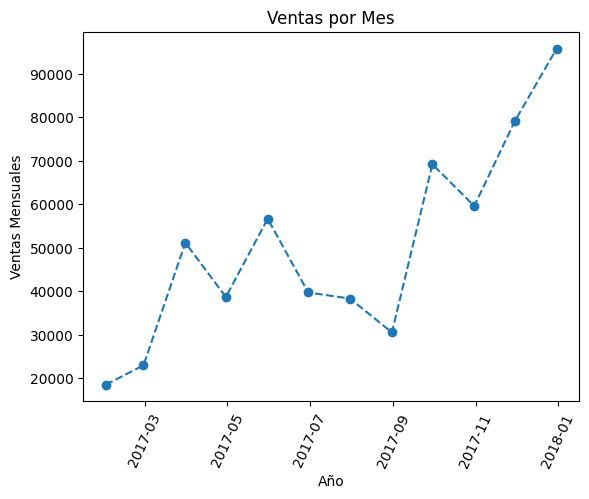

In [ ]:
#DIBUJAR BARRAS VERTICALES
plt.plot(ventas_mensuales['Fecha'], ventas_mensuales['Ventas Mensuales'], marker='o', linestyle='--')
plt.title('Ventas por Mes')
plt.xlabel('Año')
plt.xticks(rotation=65)
plt.ylabel('Ventas Mensuales')
plt.show()